# Topic: Classification Metrics

### Settings: Where applicable, use test_size=0.30, random_state=4444. This will permit comparison of results across users.

Data: congressional votes Congressional Voting Records Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


%matplotlib inline

/Users/KVASU/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Exercise 6.1

For the house representatives data set, calculate the accuracy, precision, recall and f1 scores of each classifier you built (on the test set).

In [2]:
df = pd.read_csv('house-votes-84.data', names=['Party']+['X'+str(i) for i in xrange(1,17)])
df.replace('y', 1, inplace=True)
df.replace('n', 0, inplace=True)
df.replace('?', np.nan, inplace=True)
df.fillna(df.mean(),inplace=True)
df.head()

,Party,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16
0,republican,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.362319,1.000000,1.0,1.0,0.0,1.000000
1,republican,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.0,1.0,0.0,0.812689
2,democrat,0.44208,1.0,1.0,0.417453,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,1.0,0.0,0.000000
3,democrat,0.00000,1.0,1.0,0.000000,0.504762,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,0.0,0.0,1.000000
4,democrat,1.00000,1.0,1.0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.423267,1.0,1.0,1.0,1.000000


In [3]:
X = df.drop(['Party'], axis=1)
y = df.Party
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4444)

In [4]:
model_list = [KNeighborsClassifier, LogisticRegression, GaussianNB, SVC, DecisionTreeClassifier, RandomForestClassifier]
for model in model_list:
    y_predict = model().fit(X_train, y_train).predict(X_test)
    print model.__name__,":"
    print 'Accuracy Score:', accuracy_score(y_test, y_predict)
    print 'Precision Score:', precision_score(y_test, y_predict, pos_label='republican')
    print 'Recall Score:', recall_score(y_test, y_predict, pos_label='republican')
    print 'F1 Score:', f1_score(y_test, y_predict, pos_label='republican')
    print "---------"

KNeighborsClassifier :
Accuracy Score: 0.916030534351
Precision Score: 0.905660377358
Recall Score: 0.888888888889
F1 Score: 0.897196261682
---------
LogisticRegression :
Accuracy Score: 0.93893129771
Precision Score: 0.96
Recall Score: 0.888888888889
F1 Score: 0.923076923077
---------
GaussianNB :
Accuracy Score: 0.93893129771
Precision Score: 0.979166666667
Recall Score: 0.87037037037
F1 Score: 0.921568627451
---------
SVC :
Accuracy Score: 0.954198473282
Precision Score: 0.961538461538
Recall Score: 0.925925925926
F1 Score: 0.943396226415
---------
DecisionTreeClassifier :
Accuracy Score: 0.931297709924
Precision Score: 0.941176470588
Recall Score: 0.888888888889
F1 Score: 0.914285714286
---------
RandomForestClassifier :
Accuracy Score: 0.954198473282
Precision Score: 0.98
Recall Score: 0.907407407407
F1 Score: 0.942307692308
---------


### Exercise 6.2

For each, draw the Precision-Recall curve, ROC curve and calculate the AUC.

KNeighborsClassifier - AUC: 0.948
LogisticRegression - AUC: 0.987
GaussianNB - AUC: 0.984
SVC - AUC: 0.994
DecisionTreeClassifier - AUC: 0.949
RandomForestClassifier - AUC: 0.992


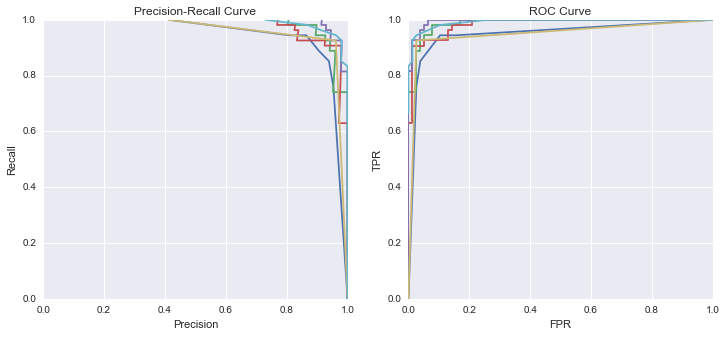

In [7]:
model_list = [KNeighborsClassifier(), LogisticRegression(), GaussianNB(), SVC(probability=True), DecisionTreeClassifier(), RandomForestClassifier()]
plt.figure(figsize=(12,5))
for model in model_list:
    prob = model.fit(X_train, y_train).predict_proba(X_test)
    precision, recall, threshold = precision_recall_curve(y_test, prob[:,1], pos_label='republican')
    fpr, tpr, threshold = roc_curve(y_test, prob[:,1], pos_label='republican')
    plt.subplot(1,2,1)
    plt.xlim(0,1)
    plt.ylabel('Recall')
    plt.xlabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.plot(precision, recall)
    plt.legend(loc=0)
    
    plt.subplot(1,2,2)
    plt.plot(fpr, tpr)
    plt.legend(loc=0)
    plt.ylabel('TPR')
    plt.xlabel('FPR')
    plt.title('ROC Curve')
    
    print (model.__str__().split('(')[0] + ' - AUC: ' + str(auc(fpr, tpr))[:5])

### Exercise 6.3

Draw the Precision-Recall curve, ROC curve (and calculate AUC) for the logistic regression classifier from Exercise 5.12 in 05-Classification Challenge that uses Haberman Survival Dataset

In [11]:
df = pd.read_csv('haberman.data.txt', names=['Age','Year','Nodes','Survived'])
df.head()

,Age,Year,Nodes,Survived
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [9]:
X = df.drop('Survived', axis = 1)
y = df.Survived
y[y==2] = 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4444)

Logistic Regression - AUC: 0.647


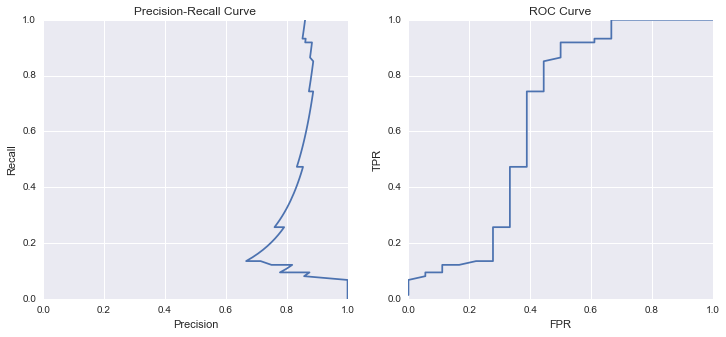

In [10]:
prob = LogisticRegression().fit(X_train, y_train).predict_proba(X_test)
precision, recall, threshold = precision_recall_curve(y_test, prob[:,1])
fpr, tpr, threshold = roc_curve(y_test, prob[:,1])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.xlim(0,1)
plt.ylim(0,1)
plt.ylabel('Recall')
plt.xlabel('Precision')
plt.title('Precision-Recall Curve')
plt.plot(precision, recall)
plt.legend(loc=0)

plt.subplot(1,2,2)
plt.plot(fpr, tpr)
plt.legend(loc=0)
plt.xlim(0,1)
plt.ylim(0,1)
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC Curve');

print ('Logistic Regression - AUC: ' + str(auc(fpr, tpr))[:5])